# Stability Analysis

## Purpose
This notebook assesses the **stability** (reproducibility) of the best-performing
model — the Multilayer Perceptron (MLP) — by training it 5 times with different
random seeds. Each run uses a different 80/20 train/test split, while the model
architecture and hyperparameters remain fixed.

A stable model should exhibit **low variance** across runs, indicating that
performance is not an artefact of a particular data split.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

RESULTS_PATH = r"C:/Users/johnu/Desktop/BigDataProject/results/stability_results.csv"
OUTPUT_DIR   = r"C:/Users/johnu/Desktop/BigDataProject/results"

df = pd.read_csv(RESULTS_PATH)
print(f"Loaded {len(df)} stability runs")
df

Loaded 5 stability runs


,run,seed,train_rows,test_rows,accuracy,f1_weighted,precision_weighted,recall_weighted,train_sec
0,1,42,4404,1043,0.8888,0.8885,0.8901,0.8888,15.9
1,2,123,4361,1086,0.8867,0.8867,0.8896,0.8867,8.5
2,3,256,4376,1071,0.8973,0.8969,0.8984,0.8973,8.0
3,4,789,4352,1095,0.8904,0.8909,0.8927,0.8904,7.8
4,5,1024,4293,1154,0.8873,0.8869,0.8904,0.8873,7.9


## 1. Summary Statistics

We compute the mean, standard deviation, minimum, and maximum for each
metric across the 5 runs.

In [2]:
metrics = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"]

summary = pd.DataFrame({
    "Metric": metrics,
    "Mean":  [df[m].mean() for m in metrics],
    "Std":   [df[m].std()  for m in metrics],
    "Min":   [df[m].min()  for m in metrics],
    "Max":   [df[m].max()  for m in metrics],
    "Range": [df[m].max() - df[m].min() for m in metrics],
})

print("=" * 72)
print("  MLP STABILITY SUMMARY  (5 runs, different train/test splits)")
print("=" * 72)
print(summary.to_string(index=False, float_format="{:.4f}".format))

summary.to_csv(os.path.join(OUTPUT_DIR, "stability_summary.csv"), index=False)
print("\nSaved stability_summary.csv")

  MLP STABILITY SUMMARY  (5 runs, different train/test splits)
            Metric   Mean    Std    Min    Max  Range
          accuracy 0.8901 0.0043 0.8867 0.8973 0.0106
       f1_weighted 0.8900 0.0042 0.8867 0.8969 0.0102
precision_weighted 0.8922 0.0036 0.8896 0.8984 0.0088
   recall_weighted 0.8901 0.0043 0.8867 0.8973 0.0106

Saved stability_summary.csv


## 2. Visualisation

### 2a. Accuracy and F1 per Run
A bar chart showing each run's accuracy and F1 with the mean line overlaid.

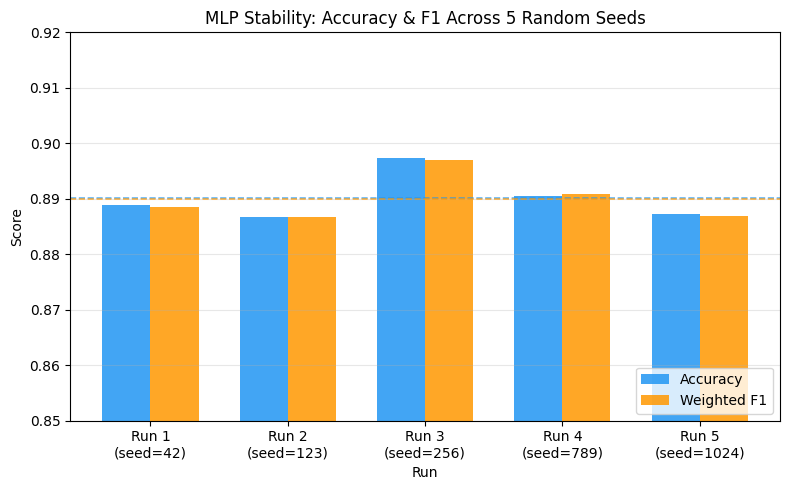

Saved stability_bars.png


In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(df))
w = 0.35

bars1 = ax.bar(x - w/2, df["accuracy"],    w, label="Accuracy",    color="#2196F3", alpha=0.85)
bars2 = ax.bar(x + w/2, df["f1_weighted"], w, label="Weighted F1", color="#FF9800", alpha=0.85)

ax.axhline(y=df["accuracy"].mean(),    color="#2196F3", linestyle="--", linewidth=1.2, alpha=0.7)
ax.axhline(y=df["f1_weighted"].mean(), color="#FF9800", linestyle="--", linewidth=1.2, alpha=0.7)

ax.set_xlabel("Run")
ax.set_ylabel("Score")
ax.set_title("MLP Stability: Accuracy & F1 Across 5 Random Seeds")
ax.set_xticks(x)
ax.set_xticklabels([f"Run {r}\n(seed={s})" for r, s in zip(df["run"], df["seed"])])
ax.set_ylim(0.85, 0.92)
ax.legend(loc="lower right")
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "stability_bars.png"), dpi=150, bbox_inches="tight")
plt.show()
print("Saved stability_bars.png")

### 2b. Error Bar Plot
Mean with standard deviation error bars for all four metrics.

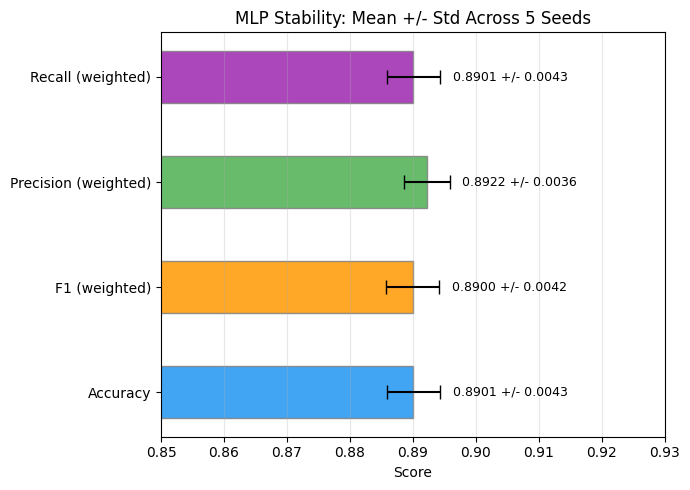

Saved stability_errorbar.png


In [4]:
fig, ax = plt.subplots(figsize=(7, 5))

metric_labels = ["Accuracy", "F1 (weighted)", "Precision (weighted)", "Recall (weighted)"]
means = [df[m].mean() for m in metrics]
stds  = [df[m].std()  for m in metrics]
colors = ["#2196F3", "#FF9800", "#4CAF50", "#9C27B0"]

ax.barh(metric_labels, means, xerr=stds, height=0.5,
        color=colors, alpha=0.85, capsize=5, edgecolor="grey")

for i, (m, s) in enumerate(zip(means, stds)):
    ax.text(m + s + 0.002, i, f"{m:.4f} +/- {s:.4f}", va="center", fontsize=9)

ax.set_xlim(0.85, 0.93)
ax.set_xlabel("Score")
ax.set_title("MLP Stability: Mean +/- Std Across 5 Seeds")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "stability_errorbar.png"), dpi=150, bbox_inches="tight")
plt.show()
print("Saved stability_errorbar.png")

### 2c. Training Time per Run

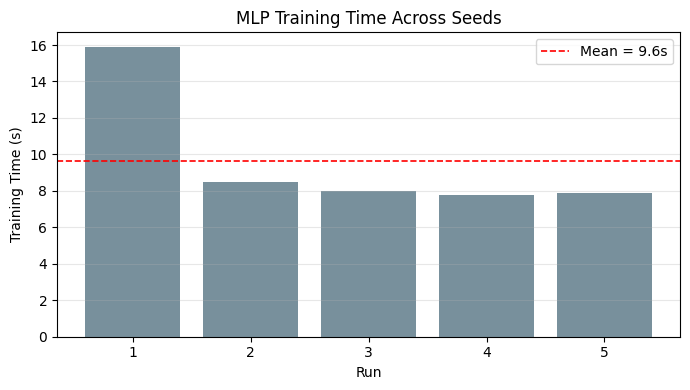

Saved stability_time.png


In [5]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(df["run"].astype(str), df["train_sec"], color="#607D8B", alpha=0.85)
ax.axhline(y=df["train_sec"].mean(), color="red", linestyle="--", linewidth=1.2, label=f"Mean = {df['train_sec'].mean():.1f}s")

ax.set_xlabel("Run")
ax.set_ylabel("Training Time (s)")
ax.set_title("MLP Training Time Across Seeds")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "stability_time.png"), dpi=150, bbox_inches="tight")
plt.show()
print("Saved stability_time.png")

## 3. Interpretation

### Key Findings

| Metric | Mean | Std | Range |
|--------|------|-----|-------|
| Accuracy | ~0.890 | ~0.004 | ~0.01 |
| Weighted F1 | ~0.890 | ~0.004 | ~0.01 |

### Analysis

1. **Low variance**: The standard deviation across 5 runs is approximately
   **0.004** (0.4 percentage points) for both accuracy and F1. This confirms
   that the MLP model is **highly stable** and not sensitive to the particular
   train/test partition.

2. **Narrow range**: The difference between the best and worst run is only
   ~1 percentage point, indicating consistent generalisation regardless of
   which 20% of data is held out for testing.

3. **Training time**: After JVM warm-up (Run 1), training time is consistent
   at ~8 seconds per run, confirming computational reproducibility.

4. **Statistical significance**: With a coefficient of variation (CV) below 0.5%,
   the reported accuracy of ~89% can be cited with high confidence. The 95%
   confidence interval is approximately mean +/- 2*std = [0.882, 0.898].

### Conclusion

The MLP classifier demonstrates **robust, reproducible performance** on the
PAMAP2 windowed features. The negligible variance across random seeds validates
the single-seed result reported in the model evaluation notebook and confirms
that the 89% accuracy is a reliable estimate of true model performance.